<a href="https://colab.research.google.com/github/Rmm6699/HW/blob/master/Hands_on_Week2_20220916.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the environment


1.   update the version of statmodels and pmdarima
2.   download the data



In [ ]:
!pip uninstall statsmodels -y
!pip install statsmodels 
!pip install pmdarima
!wget -q -O "MA_data.csv" "https://docs.google.com/uc?export=download&id=1XNW_Qk_CxD0KubiQlhmaWKyawR_iWVPd"
!wget -q -O "ARMA_data.csv" "https://docs.google.com/uc?export=download&id=1QmAbBZ2ot7xVCpSI-KBqAH60l7iesJX0"
!wget -q -O "AR_data.csv" "https://docs.google.com/uc?export=download&id=1MxtlH9qdsv1lC3Uj1D8OglHw0fLTlFuq"
!wget -q -O "Practice_ARMA_data.csv" "https://docs.google.com/uc?export=download&id=1_R2-iOQZAZUahGmM1E25LBEBH0Lwqsg0"
!wget -q -O "AirPassengers.csv" "https://docs.google.com/uc?export=download&id=1MRg5tl_Vj0t53c0o0o8pIP4O-Jgq9_pm"

Found existing installation: statsmodels 0.13.2
Uninstalling statsmodels-0.13.2:
  Successfully uninstalled statsmodels-0.13.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached statsmodels-0.13.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#For ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA
#MSE
from sklearn.metrics import mean_squared_error

# MA

## Generate Some Data by data generator

<class 'pandas.core.frame.DataFrame'> 300


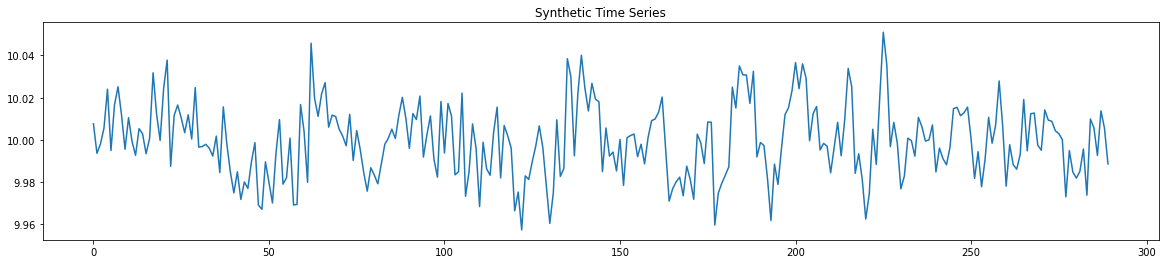

In [ ]:
# series_MA = arma_generate_sample(ar=[1], ma=[1, 0.6, 0.4, 0.8, 0.75, -0.3], nsample=300, scale=0.01)
# series_MA = 10 + series_MA
# print(type(series_MA), len(series_MA))
series_MA = pd.read_csv('/content/MA_data.csv',header=None)
print(type(series_MA), series_MA.size)
series_MA[:-10].plot(title="Synthetic Time Series", figsize=(20,4), legend=False)

In [ ]:
#Train and Test data
train_end = series_MA.size - 10
test_end = series_MA.size
train_data = series_MA[:train_end]
test_data = series_MA[train_end:test_end]

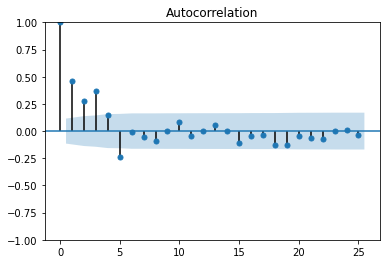

In [ ]:
series_acf1 = plot_acf(train_data)

## Training

In [ ]:
#create the MA(3) model
MA_model = ARIMA(train_data, order=[0,0,3])
#fit the model
MA_model_fit = MA_model.fit()
#summary of the model
print(MA_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  290
Model:                 ARIMA(0, 0, 3)   Log Likelihood                 827.503
Date:                Fri, 16 Sep 2022   AIC                          -1645.007
Time:                        07:39:13   BIC                          -1626.657
Sample:                             0   HQIC                         -1637.655
                                - 290                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9987      0.002   5944.793      0.000       9.995      10.002
ma.L1         -0.0192      0.049     -0.388      0.698      -0.116       0.078
ma.L2          0.3639      0.042      8.725      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


## Testing

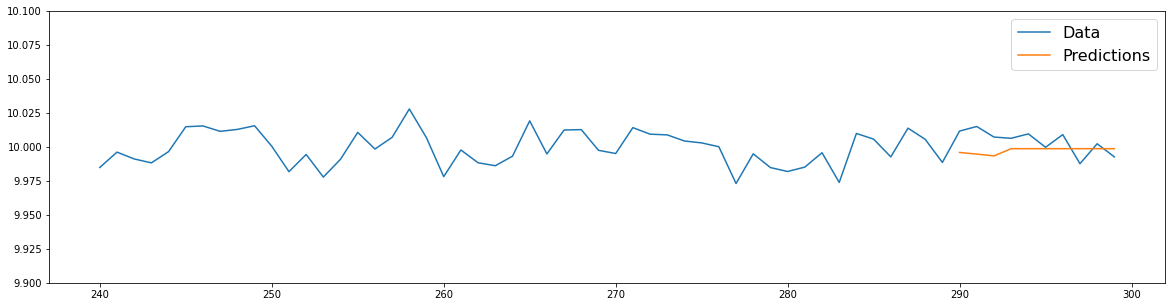

In [ ]:
#get prediction start and end indices
pred_start = test_data.index[0]
pred_end = test_data.index[-1]
#get the predictions
MA_predictions = MA_model_fit.predict(start=pred_start, end=pred_end)

#Plot Data and Predictions
plt.figure(figsize=(20,5))
plt.plot(series_MA[int(-0.2*len(series_MA)):])
plt.plot(MA_predictions)
plt.ylim(9.9, 10.1)
plt.legend(('Data', 'Predictions'), fontsize=16)

In [ ]:
#MSE
MA_pred_mse = mean_squared_error(test_data, MA_predictions)
print("MA MSE: ", MA_pred_mse)
print('MA RMSE:', np.sqrt(MA_pred_mse))

MA MSE:  0.00013092677962791714
MA RMSE: 0.011442324048370468


#AR

## Generate Some Data by data generator





<class 'pandas.core.frame.DataFrame'> 300


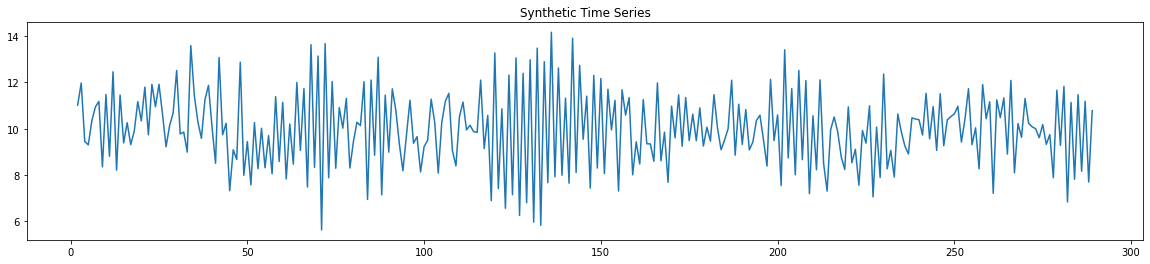

In [ ]:
# series_AR = arma_generate_sample(ar=[1, 0.25, -0.25, 0.3, -0.45, -0.4], ma=[1], nsample=300, scale=1)
# series_AR = 10 + series_AR
# print(type(series_AR), len(series_AR))
series_AR = pd.read_csv('/content/AR_data.csv',header=None)
print(type(series_AR), series_AR.size)
series_AR[2 : -10].plot(title="Synthetic Time Series", figsize=(20,4), legend=None)

In [ ]:
#Train and Test data
train_end = series_AR.size - 10
test_end = series_AR.size
train_data = series_AR[:train_end]
test_data = series_AR[train_end:test_end]

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


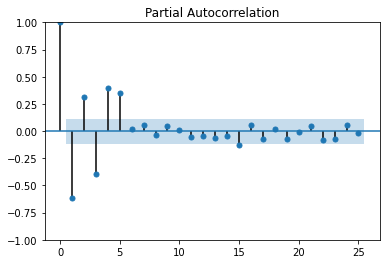

In [ ]:
series_pacf1 = plot_pacf(train_data)

## Training

In [ ]:
#create the AR(5) model
AR_model = ARIMA(train_data, order=[5,0,0])
#fit the model
AR_model_fit = AR_model.fit()
#summary of the model
print(AR_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  290
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -409.451
Date:                Fri, 16 Sep 2022   AIC                            832.902
Time:                        07:43:34   BIC                            858.591
Sample:                             0   HQIC                           843.194
                                - 290                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9755      0.099    101.136      0.000       9.782      10.169
ar.L1         -0.2823      0.059     -4.805      0.000      -0.397      -0.167
ar.L2          0.1856      0.052      3.580      0.0

## Testing

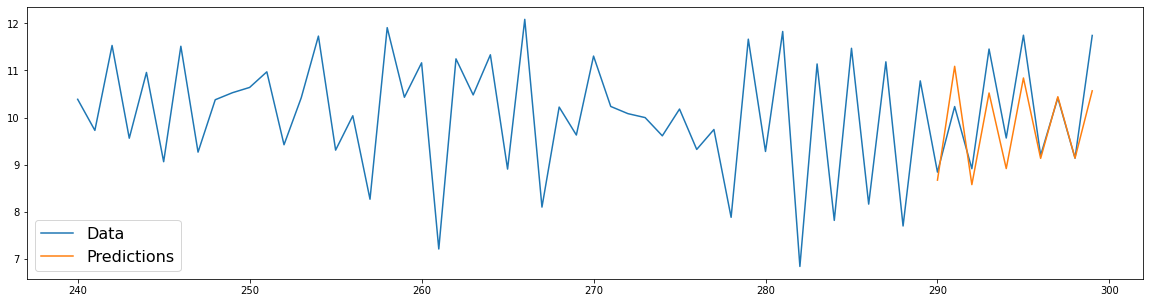

In [ ]:
#get prediction start and end indices
pred_start = test_data.index[0]
pred_end = test_data.index[-1]
#get the predictions
AR_predictions = AR_model_fit.predict(start=pred_start, end=pred_end)
#Plot Data and Predictions
plt.figure(figsize=(20,5))
plt.plot(series_AR[int(-0.2*len(series_AR)):])
plt.plot(AR_predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)

In [ ]:
#MSE
AR_pred_mse = mean_squared_error(test_data, AR_predictions)
print("AR MSE: ", AR_pred_mse)
print('AR RMSE:', np.sqrt(AR_pred_mse))

AR MSE:  0.43705580808535976
AR RMSE: 0.661101964968612


#ARMA

## Generate Some Data by data generator

<class 'pandas.core.frame.DataFrame'> 300


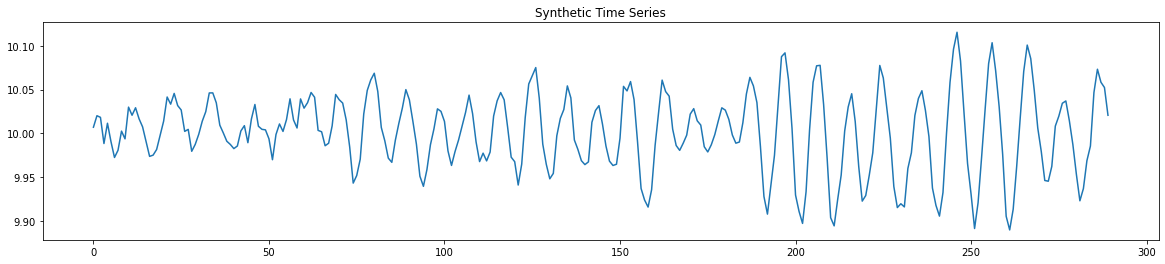

In [ ]:
# series_ARMA = arma_generate_sample(ar=[1, -0.4, -0.25, 0.3, 0.4, 0.1], ma=[1, 0.6, 0.4, 0.8, 0.75, -0.3], nsample=300, scale=0.01)
# series_ARMA = 10 + series_ARMA
# print(type(series_ARMA), len(series_ARMA))
series_ARMA = pd.read_csv('/content/ARMA_data.csv',header=None)
print(type(series_ARMA), series_ARMA.size)
series_ARMA[:-10].plot(title="Synthetic Time Series", figsize=(20,4), legend=False)

In [ ]:
#Train and Test data
train_end = series_ARMA.size - 10
test_end = series_ARMA.size
train_data = series_ARMA[:train_end]
test_data = series_ARMA[train_end:test_end]

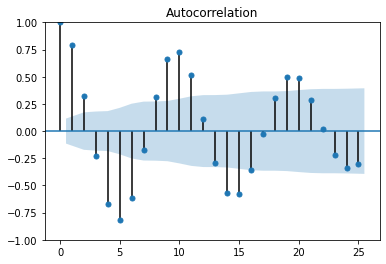

In [ ]:
series_acf1 = plot_acf(train_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


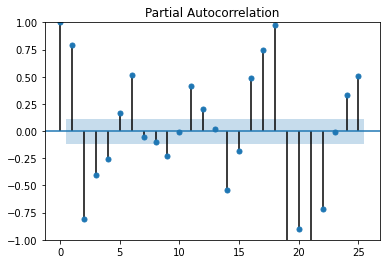

In [ ]:
series_pacf1 = plot_pacf(train_data)

In [ ]:
train_data_diff = train_data.diff().dropna()

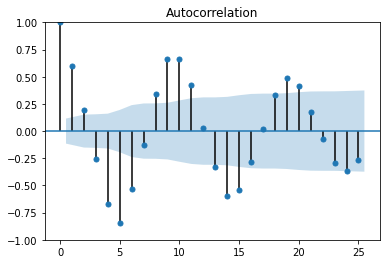

In [ ]:
series_diff_acf1 = plot_acf(train_data_diff)

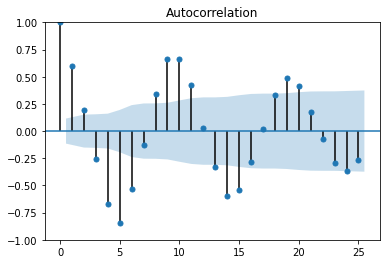

In [ ]:
series_diff_pacf1 = plot_acf(train_data_diff)

## Training

In [ ]:
#create the ARMA(6,6) model
ARMA_model = ARIMA(train_data, order=[6,0,6])
#fit the model
ARMA_model_fit = ARMA_model.fit()
#summary of the model
print(ARMA_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  290
Model:                 ARIMA(6, 0, 6)   Log Likelihood                 889.524
Date:                Fri, 16 Sep 2022   AIC                          -1751.047
Time:                        07:48:48   BIC                          -1699.669
Sample:                             0   HQIC                         -1730.463
                                - 290                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0006      0.002   4639.503      0.000       9.996      10.005
ar.L1          1.5539      0.176      8.852      0.000       1.210       1.898
ar.L2         -0.4900      0.228     -2.145      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


## Testing

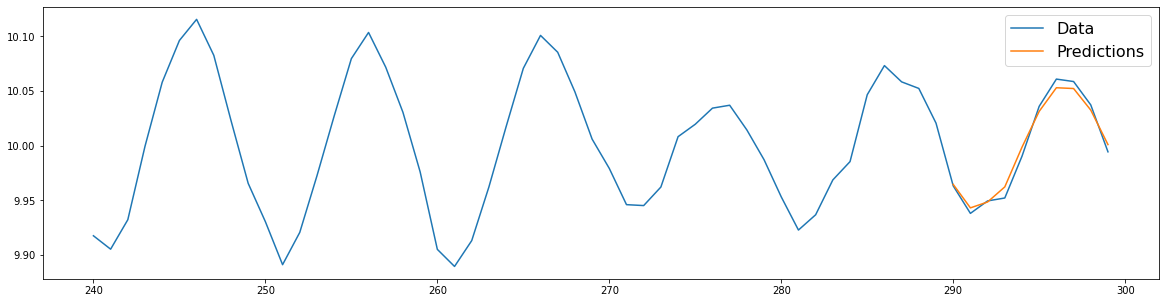

In [ ]:
#get prediction start and end indices
pred_start = test_data.index[0]
pred_end = test_data.index[-1]
#get the predictions
ARMA_predictions = ARMA_model_fit.predict(start=pred_start, end=pred_end)
#Plot Data and Predictions
plt.figure(figsize=(20,5))
plt.plot(series_ARMA[int(-0.2*len(series_ARMA)):])
plt.plot(ARMA_predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)

In [ ]:
#MSE
ARMA_pred_mse = mean_squared_error(test_data, ARMA_predictions)
print("ARMA MSE: ", ARMA_pred_mse)
print('ARMA RMSE:', np.sqrt(ARMA_pred_mse))

ARMA MSE:  3.9143841901081904e-05
ARMA RMSE: 0.006256503967958616


# Auto ARIMA

In [ ]:
#Auto-ARIMA
from pmdarima.arima import auto_arima

In [ ]:
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(train_data, start_p = 1, d=0, start_q = 1, 
                          max_p = 10, max_q = 10, max_d=10,
                          seasonal = False, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)  

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1327.975, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2160.573, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1356.321, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-1484.259, Time=0.45 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.80 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=1.64 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1342.545, Time=0.47 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-822.983, Time=0.96 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1569.947, Time=4.47 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-874.403, Time=0.77 s

In [ ]:
# To print the summary 
print(arima_model.summary() ) #Note down the Model and details.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  290
Model:               SARIMAX(6, 0, 0)   Log Likelihood                 851.959
Date:                Fri, 16 Sep 2022   AIC                          -1687.919
Time:                        07:56:32   BIC                          -1658.560
Sample:                             0   HQIC                         -1676.156
                                - 290                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.0754      0.594      5.177      0.000       1.911       4.240
ar.L1          0.9784      0.056     17.518      0.000       0.869       1.088
ar.L2         -0.1096      0.078     -1.413      0.1

In [ ]:
#get prediction start and end indices
pred_start = test_data.index[0]
pred_end = test_data.index[-1]
print(pred_start, pred_end)

290 299


In [ ]:
#get the predictions
ARIMA_predictions = arima_model.predict(start=pred_start, end=pred_end)
print(len(ARIMA_predictions))

10


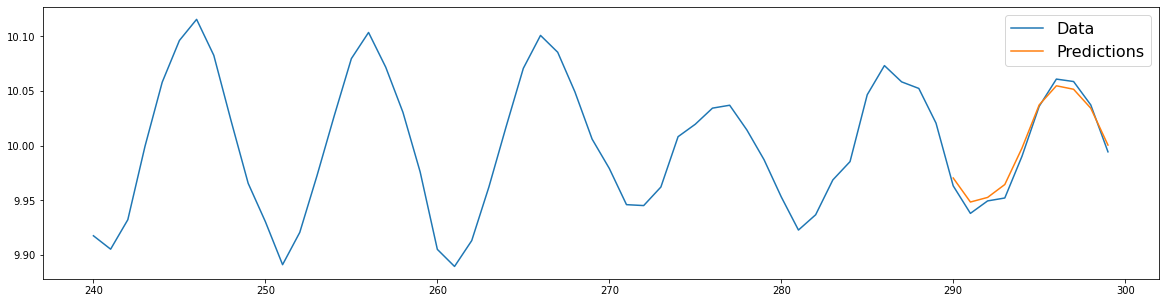

In [ ]:
#Plot Data and Predictions
plt.figure(figsize=(20,5))

plt.plot(series_ARMA[int(-0.2*len(series_ARMA)):])
plt.plot(ARIMA_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [ ]:
#MSE
pred_mse = mean_squared_error(test_data, ARIMA_predictions)
print("MSE: ", pred_mse)

MSE:  5.147021233104321e-05


In [ ]:
#RMSE
pred_rmse = np.sqrt(pred_mse)
print("RMSE: ", pred_rmse)

RMSE:  0.0071742743417744495


# Practice: Please finish the following terms


1.   Generate some series by data generator
2.   Check the ACF and PACF of the series
3.   Train an ARIMA model to predict the series
4.   Apply Auto-ARIMA to find the best parameter of ARIMA



## Data Generator

You need to modify this block

In [ ]:
# series = arma_generate_sample(ar=[1, -0.4, -0.25, 0.8, -0.3, -0.15, 0.75], ma=[1, -0.25, 0.35, 0.45, -0.4], nsample=300, scale=1)
# series = 10 + series

You don't need to modify the following block

In [ ]:
# print(type(series), len(series))
series = pd.read_csv('/content/Practice_ARMA_data.csv',header=None)
print(type(series), series.size)
series.plot(title="Synthetic Time Series", figsize=(20,4), legend=False)

## Training data and Testing data prepartion

In [ ]:
#Train and Test data
train_end = series.size - 10
test_end = series.size

train_data = series[:train_end]
test_data = series[train_end:test_end]

## ACF and PACF test

In [ ]:
series_acf1 = plot_acf(train_data)
series_pacf1 = plot_pacf(train_data)

## Differencing Series and do ACF and PACF test (optional)

In [ ]:
train_data_diff = train_data.diff().dropna()
train_data_diff_acf1 = plot_acf(train_data_diff)
train_data_diff_pacf1 = plot_pacf(train_data_diff)

## ARIMA model ceration

You need to modify this block

In [ ]:
#create the AR(X) model
AR_model = ARIMA(train_data, order=[5,0,5])

You don't need to modify this block

In [ ]:
#fit the model
AR_model_fit = AR_model.fit()
#summary of the model
print(AR_model_fit.summary())

## Testing the models

In [ ]:
#get prediction start and end indices
pred_start = test_data.index[0]
pred_end = test_data.index[-1]
#get the predictions
AR_predictions = AR_model_fit.predict(start=pred_start, end=pred_end)
#Plot Data and Predictions
plt.figure(figsize=(20,5))

plt.plot(series[int(-0.2*len(series)):])
plt.plot(AR_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)
#MSE
AR_pred_mse = mean_squared_error(test_data, AR_predictions)
print("MSE: ", AR_pred_mse)
print('RMSE:', np.sqrt(AR_pred_mse))

### Auto ARIMA

You can modify the parameter of the auto arima

In [ ]:
from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(train_data, start_p = 1, d=1, start_q = 1, 
                          max_p = 10, max_q = 10, max_d=10,
                          seasonal = False, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)  

In [ ]:
# To print the summary 
print(arima_model.summary() ) #Note down the Model and details.

### Auto ARIMA testing

In [ ]:
#get prediction start and end indices
pred_start = test_data.index[0]
pred_end = test_data.index[-1]
print(pred_start, pred_end)
#get the predictions
ARIMA_predictions = arima_model.predict(start=pred_start, end=pred_end)
print(len(ARIMA_predictions))
#Plot Data and Predictions
plt.figure(figsize=(20,5))

plt.plot(series[int(-0.2*len(series)):])
plt.plot(ARIMA_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)
#MSE
pred_mse = mean_squared_error(test_data, ARIMA_predictions)
print("MSE: ", pred_mse)
#RMSE
pred_rmse = np.sqrt(pred_mse)
print("RMSE: ", pred_rmse)

# Seasonal ARIMA

## Data prepartion

In [ ]:
#Dataset from: https://www.kaggle.com/datasets/rakannimer/air-passengers
air_passengers_data = pd.read_csv('AirPassengers.csv', index_col=[0], parse_dates=[0])

In [ ]:
air_passengers_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
air_passengers_data.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [ ]:
air_passengers_data.size

144

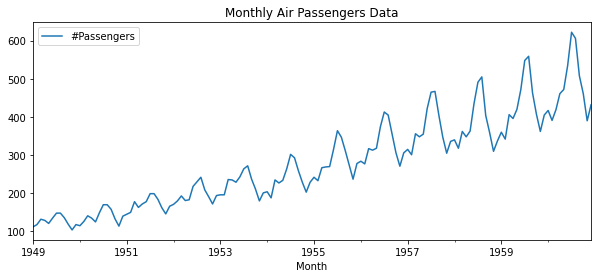

In [ ]:
air_passengers_data.plot(title="Monthly Air Passengers Data", figsize=(10,4))

## ACF, PACF and ADF test

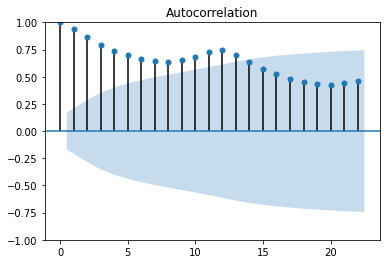

In [ ]:
data_acf1 = plot_acf(air_passengers_data[:-12])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


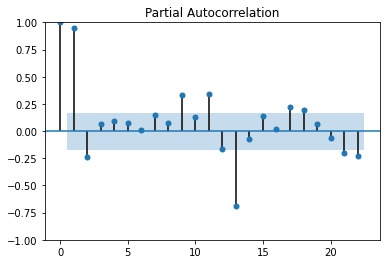

In [ ]:
data_pacf1 = plot_pacf(air_passengers_data[:-12])

In [ ]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(air_passengers_data)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")

pvalue =  0.991880243437641  if above 0.05, data is not stationary


## Differencing

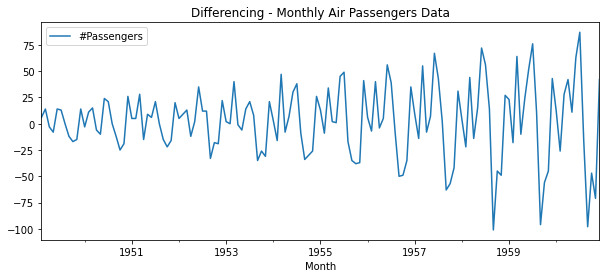

In [ ]:
#Differencing
air_passengers_data_diff = air_passengers_data.diff().dropna()
air_passengers_data_diff.plot(title="Differencing - Monthly Air Passengers Data", figsize=(10,4))

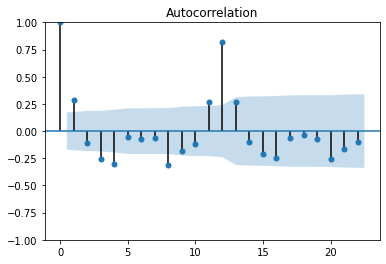

In [ ]:
data_diff_acf1 = plot_acf(air_passengers_data_diff[:-12])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


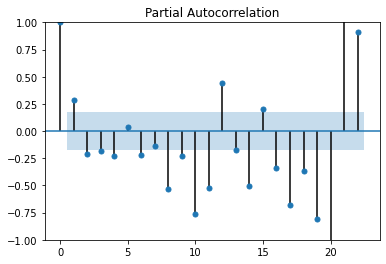

In [ ]:
data_diff_pacf1 = plot_pacf(air_passengers_data_diff[:-12])

In [ ]:
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(air_passengers_data_diff)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")

pvalue =  0.054213290283824704  if above 0.05, data is not stationary


## training SARIMA

In [ ]:
#Train and Test data
train_end = air_passengers_data.size - 12
test_end = air_passengers_data.size

train_data = air_passengers_data[:train_end]
test_data = air_passengers_data[train_end:test_end]

In [ ]:
train_data.tail()

,#Passengers
Month,
1959-08-01,559
1959-09-01,463
1959-10-01,407
1959-11-01,362
1959-12-01,405


In [ ]:
test_data.head()

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472


## Using Auto ARIMA to find the best parameter

In [ ]:
#Auto-ARIMA
from pmdarima.arima import auto_arima
arima_model = auto_arima(train_data, seasonal = True, m=12, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.38 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.17 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.38 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.18 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.32 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.55 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.16 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.41 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [ ]:
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(train_data, start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=900.971, Time=0.09 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=905.065, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=900.823, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=901.721, Time=0.19 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=899.902, Time=0.07 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=901.052, Time=0.18 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=901.337, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=900.685, Time=0.06 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=902.967, Time=0.25 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=901.457, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 2.301 seconds


In [ ]:
# To print the summary 
print(arima_model.summary() ) #Note down the Model and details.

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -447.951
Date:                            Fri, 16 Sep 2022   AIC                            899.902
Time:                                    08:45:40   BIC                            905.460
Sample:                                01-01-1949   HQIC                           902.159
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2431      0.090     -2.697      0.007      -0.420      -0.066
sigma2       108.8757     13.306   

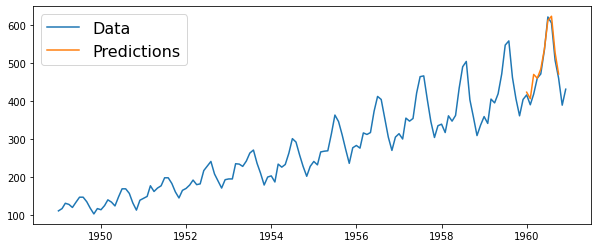

In [ ]:
#prediction index range
pred_start = test_data.index[0]
pred_end = test_data.index[-1]
#get the predictions
predictions = arima_model.predict(start=pred_start, end=pred_end)
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(air_passengers_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

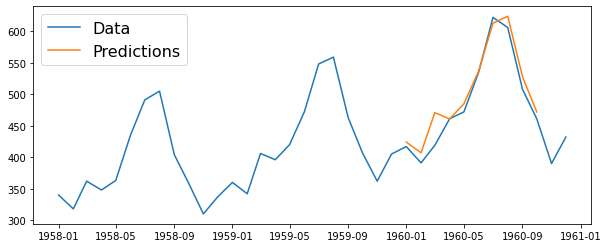

In [ ]:
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(air_passengers_data[-36:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [ ]:
#MSE
pred_mse = mean_squared_error(test_data[:-2], predictions)
print("MSE: ", pred_mse)

MSE:  407.90644918136957


In [ ]:
#RMSE
pred_rmse = np.sqrt(pred_mse)
print("RMSE: ", pred_rmse)

RMSE:  20.19669401613466


# SARIMAX

In [ ]:
#SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -447.951
Date:                            Fri, 16 Sep 2022   AIC                            899.902
Time:                                    08:47:47   BIC                            905.460
Sample:                                01-01-1949   HQIC                           902.159
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2431      0.090     -2.697      0.007      -0.420      -0.066
sigma2       108.8757     13.306   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


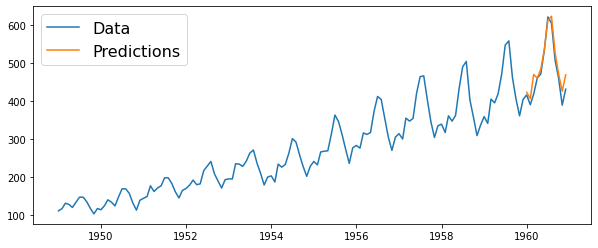

In [ ]:
#Model: SARIMAX(1, 1, 0)x(0, 1, 0, 12)
model = SARIMAX(train_data,  
                order = (1, 1, 0),  
                seasonal_order =(0, 1, 0, 12)) 
#fit the model
model_fit = model.fit()
#summary of the model
print(model_fit.summary())
#prediction index range
pred_start = test_data.index[0]
pred_end = test_data.index[-1]
#get the predictions
predictions = model_fit.predict(start=pred_start, end=pred_end)
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(air_passengers_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

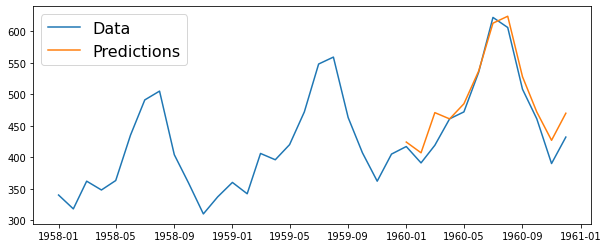

In [ ]:
#Plot Data and Predictions
plt.figure(figsize=(10,4))

plt.plot(air_passengers_data[-36:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [ ]:
#MSE
pred_mse = mean_squared_error(test_data, predictions)
print("MSE: ", pred_mse)

MSE:  572.7249820471321


In [ ]:
#RMSE
pred_rmse = np.sqrt(pred_mse)
print("RMSE: ", pred_rmse)

RMSE:  23.93167319781741
